In [2]:
import heapq
import random
import matplotlib.pyplot as plt
import numpy as np

def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

def a_star(labirinto, start, ends):
    N, M = len(labirinto), len(labirinto[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Cima, Baixo, Esquerda, Direita
    open_set = []
    heapq.heappush(open_set, (0, start))  # (custo total estimado, posição)
    came_from = {}
    g_score = {start: 0}
    f_score = {start: min(manhattan_distance(*start, *end) for end in ends)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current in ends:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        x, y = current
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < N and 0 <= ny < M and labirinto[nx][ny] != 1:
                tentative_g_score = g_score[current] + 1

                if (nx, ny) not in g_score or tentative_g_score < g_score[(nx, ny)]:
                    came_from[(nx, ny)] = current
                    g_score[(nx, ny)] = tentative_g_score
                    f_score[(nx, ny)] = tentative_g_score + min(manhattan_distance(nx, ny, *end) for end in ends)
                    heapq.heappush(open_set, (f_score[(nx, ny)], (nx, ny)))

    return "Nenhum caminho encontrado."


Caminho encontrado: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (2, 26), (2, 27), (3, 27), (3, 28), (3, 29), (3, 30), (3, 31), (3, 32), (3, 33), (3, 34), (3, 35), (4, 35), (5, 35), (6, 35), (6, 36), (6, 37), (6, 38), (6, 39), (6, 40), (6, 41), (6, 42), (7, 42), (7, 43), (8, 43), (8, 44), (8, 45), (8, 46), (8, 47), (8, 48), (9, 48), (10, 48), (10, 49), (10, 50), (10, 51), (11, 51), (11, 52), (11, 53), (12, 53), (13, 53), (14, 53), (14, 54), (15, 54), (15, 55), (15, 56), (15, 57), (15, 58), (15, 59), (15, 60), (16, 60), (16, 61), (16, 62), (17, 62), (17, 63), (17, 64), (18, 64), (18, 65), (18, 66), (18, 67), (19, 67), (19, 68), (19, 69), (19, 70), (19, 71), (19, 72), (19, 73), (20, 73), (20, 74), (20, 75), (20, 76), (20, 77), (20, 78), (20, 79), (20, 80), (20, 81), (20, 82), (21, 82), (21, 83

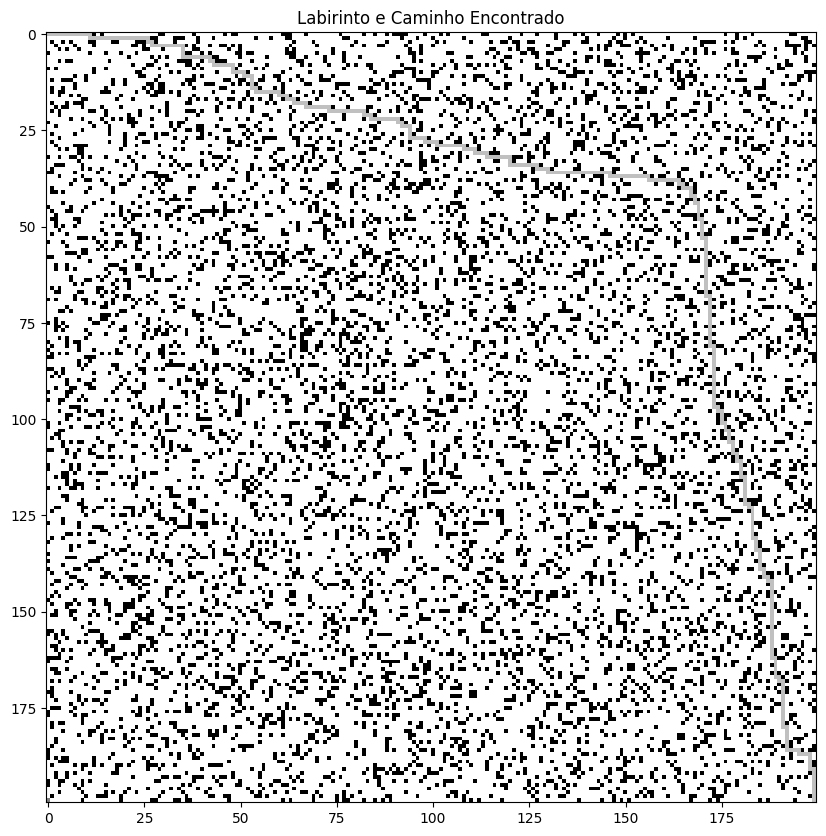

In [4]:

# Criar um labirinto 500x500 com obstáculos aleatórios
N, M = 200, 200
labirinto = [[0 if random.random() > 0.2 else 1 for _ in range(M)] for _ in range(N)]

# Definir ponto inicial e duas saídas
labirinto[0][0] = 'S'
labirinto[N-1][M-1] = 'D'
labirinto[N-1][0] = 'D'

start = (0, 0)
ends = [(N-1, M-1), (N-1, M-1)]

resultado = a_star(labirinto, start, ends)
print("Caminho encontrado:" if isinstance(resultado, list) else resultado, resultado)

# Gerar imagem do labirinto e do caminho encontrado
def plot_labirinto(labirinto, path):
    img = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            if labirinto[i][j] == 1:
                img[i, j] = 0  # Parede (preto)
            elif labirinto[i][j] in ['S', 'D']:
                img[i, j] = 0.5  # Início e saída (cinza)
            else:
                img[i, j] = 1  # Caminho livre (branco)

    if isinstance(path, list):
        for x, y in path:
            img[x, y] = 0.75  # Caminho encontrado (azul claro)

    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap="gray")
    plt.title("Labirinto e Caminho Encontrado")
    plt.show()

plot_labirinto(labirinto, resultado)


[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 7),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (3, 10),
 (4, 10),
 (5, 10),
 (6, 10),
 (7, 10),
 (8, 10),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (9, 14),
 (9, 15),
 (10, 15),
 (11, 15),
 (12, 15),
 (12, 16),
 (12, 17),
 (12, 18),
 (13, 18),
 (14, 18),
 (15, 18),
 (16, 18),
 (16, 19),
 (16, 20),
 (17, 20),
 (17, 21),
 (18, 21),
 (19, 21),
 (19, 22),
 (20, 22),
 (20, 23),
 (20, 24),
 (21, 24),
 (21, 25),
 (21, 26),
 (21, 27),
 (21, 28),
 (21, 29),
 (22, 29),
 (23, 29),
 (23, 30),
 (23, 31),
 (24, 31),
 (25, 31),
 (26, 31),
 (26, 32),
 (26, 33),
 (27, 33),
 (28, 33),
 (28, 34),
 (28, 35),
 (29, 35),
 (29, 36),
 (29, 37),
 (29, 38),
 (29, 39),
 (30, 39),
 (31, 39),
 (32, 39),
 (32, 40),
 (32, 41),
 (33, 41),
 (33, 42),
 (34, 42),
 (34, 43),
 (35, 43),
 (35, 44),
 (36, 44),
 (36, 45),
 (36, 46),
 (37, 46),
 (37, 47),
 (37, 48),
 (37, 49),
 (38, 49),
 (39, 49),
 (39, 50),
 (40, 50),
 (40, 51),
 (40, 52),
 (41, 52),
 (4

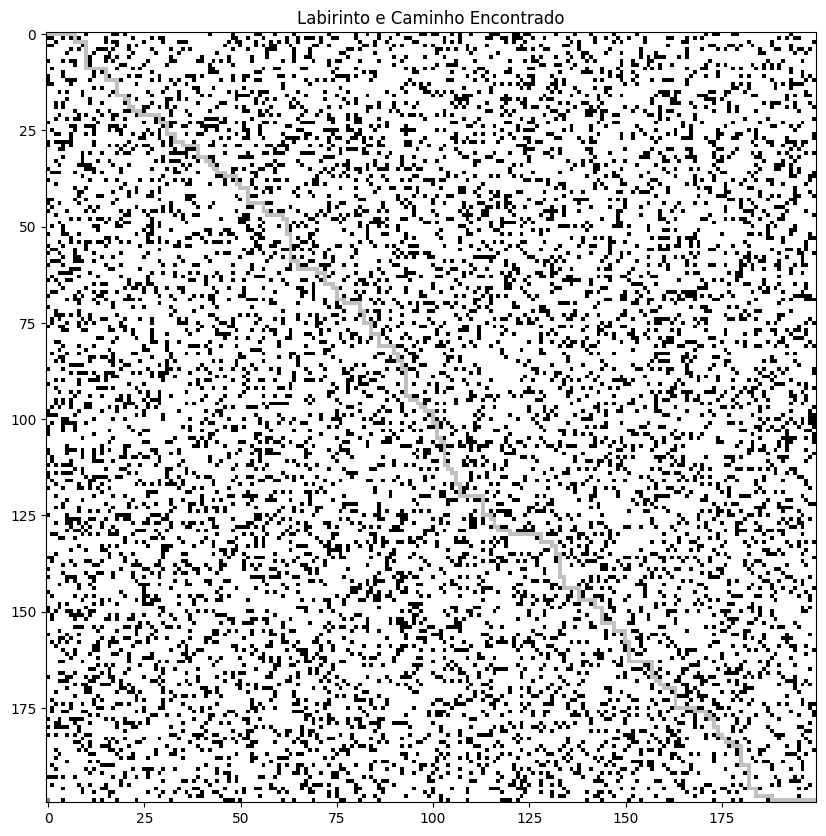

In [25]:

import heapq
import random

def gerar_pesos(N, M):
    """
    Gera pesos aleatórios para cada transição válida no labirinto.
    """
    pesos = {}
    movimentos = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for i in range(N):
        for j in range(M):
            for dx, dy in movimentos:
                nx, ny = i + dx, j + dy
                if 0 <= nx < N and 0 <= ny < M:
                    pesos[((i, j), (nx, ny))] = random.randint(1, 10)

    return pesos

def a_star2(labirinto, pesos):
    """
    Encontra o caminho mais curto em um labirinto modelado como um grafo,
    considerando pesos variáveis entre as transições dos pontos.
    """
    # Dimensões do labirinto
    N, M = len(labirinto), len(labirinto[0])

    # Encontrando os pontos inicial e destino
    inicio, destino = None, None
    for i in range(N):
        for j in range(M):
            if labirinto[i][j] == 'S':
                inicio = (i, j)
            elif labirinto[i][j] == 'D':
                destino = (i, j)

    if not inicio or not destino:
        return "Labirinto inválido!"

    # Heurística: Distância de Manhattan
    def heuristica(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    # Movimentos possíveis (cima, baixo, esquerda, direita)
    movimentos = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Fila de prioridade (custo, nó atual, caminho percorrido)
    fila = [(0, inicio, [])]
    heapq.heapify(fila)

    # Dicionário para armazenar o menor custo encontrado até um ponto
    custos = {inicio: 0}

    while fila:
        custo_atual, (x, y), caminho = heapq.heappop(fila)

        # Se chegamos ao destino, retornamos o caminho
        if (x, y) == destino:
            return caminho + [(x, y)]

        for dx, dy in movimentos:
            nx, ny = x + dx, y + dy

            if 0 <= nx < N and 0 <= ny < M and labirinto[nx][ny] != 1:
                peso = pesos.get(((x, y), (nx, ny)), 1)  # Peso da transição
                novo_custo = custo_atual + peso

                if (nx, ny) not in custos or novo_custo < custos[(nx, ny)]:
                    custos[(nx, ny)] = novo_custo
                    prioridade = novo_custo + heuristica((nx, ny), destino)
                    heapq.heappush(fila, (prioridade, (nx, ny), caminho + [(x, y)]))

    return "Nenhum caminho encontrado"


N, M = 200, 200
labirinto = [[0 if random.random() > 0.2 else 1 for _ in range(M)] for _ in range(N)]

# Definir ponto inicial e duas saídas
labirinto[0][0] = 'S'
labirinto[N-1][M-1] = 'D'
labirinto[N-1][0] = 'D'

import pprint as pp

N, M = len(labirinto), len(labirinto[0])
pesos = gerar_pesos(N, M)

# Executar o algoritmo
caminho = a_star2(labirinto, pesos)

print(pp.pformat(caminho))
#print(pp.pformat(pesos))


plot_labirinto(labirinto, caminho)
